# Houston - House Prices vs Oil Prices
----

### Analysis
* This study shall focus on the correlation between fluctuations in oil and gas prices and the strength of the correlation with house prices in Houston.
* Houston is the oil and gas capital of the USA - and it would be interesting to investigate the impact of oil prices on the local economy with respect to the housing market.
* In addition to focussing on the city of Houston, other major cities in Texas, such as Dallas and Austin shall be used to confirm the strength of the impact emanating from the energy industry.
* A comparison of the labor market involved in the oil/gas sector by each of the cities is a good starting point on which to base the argument.

---

#### Note
* The FRED API shall be utilized for gathering the data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json

# Import API key
import config
from config import api_key

# Output File (CSV)
output_data_file = "output_data/house_prices.csv"

# Range of House Prices
api_key

'4597521cfbcf8c9643d4d2ad60fa1de3'

In [2]:
# New Dependency! Use this to pretty print the JSON
# https://docs.python.org/3/library/pprint.html
from pprint import pprint

In [3]:
# The URL for the FRED API
base = 'https://api.stlouisfed.org/fred/series/observations?series_id='

# List of FRED series IDs and their description
s_dict = {'ATNHPIUS26420Q': 'House Price Index for Houston', 
          'ATNHPIUS19124Q': 'House Price Index for Dallas',
          'ATNHPIUS12420Q': 'House Price Index for Austin',
          'USSTHPI': 'House Price Index for the United States',
          'POILWTIUSDM': 'Global price of WTI Crude'
          }

#'POILWTIUSDM': 'Global price of WTI Crude'

# Include start date, API key from config.py file and file type json
start_date = '1990-01-02'
s_dates = '&observation_start={}'.format(start_date)
end_date = '2017-01-02'
e_dates = '&observation_end={}'.format(end_date)

api_key = '&api_key={}'.format(config.api_key)

ftype = '&file_type=json'
frequency = 'q'
freq = '&frequency={}'.format(frequency)
aggregation = 'eop'
agg = '&aggregation_method={}'.format(aggregation)

In [4]:
df = pd.DataFrame()
for code, name in s_dict.items():
    url = '{}{}{}{}{}{}{}{}'.format(base, code, s_dates,e_dates, api_key, ftype,freq,agg)
    r = requests.get(url).json()['observations']
    df[name] = [i['value'] for i in r]
df.index = pd.to_datetime([i['date'] for i in r])
df.head(5)
#df.describe
#r

,House Price Index for Houston,House Price Index for Dallas,House Price Index for Austin,House Price Index for the United States,Global price of WTI Crude
1990-01-01,91.49,94.53,72.82,164.17,20.4100000000000
1990-04-01,92.52,95.07,73.07,164.85,16.6900000000000
1990-07-01,93.75,95.30,72.33,165.84,33.8000000000000
1990-10-01,93.56,94.55,72.92,165.2,27.3300000000000
1991-01-01,94.46,95.79,75.06,166.56,19.8700000000000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### House Price Index vs. Oil Price

In [5]:
x_axis = df.index.values

In [6]:
df.dtypes

House Price Index for Houston              object
House Price Index for Dallas               object
House Price Index for Austin               object
House Price Index for the United States    object
Global price of WTI Crude                  object
dtype: object

In [7]:
cols = df.columns[df.dtypes.eq(object)]
cols

Index(['House Price Index for Houston', 'House Price Index for Dallas',
       'House Price Index for Austin',
       'House Price Index for the United States', 'Global price of WTI Crude'],
      dtype='object')

In [8]:
for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df.dtypes

House Price Index for Houston              float64
House Price Index for Dallas               float64
House Price Index for Austin               float64
House Price Index for the United States    float64
Global price of WTI Crude                  float64
dtype: object

In [9]:
df.to_csv(output_data_file)

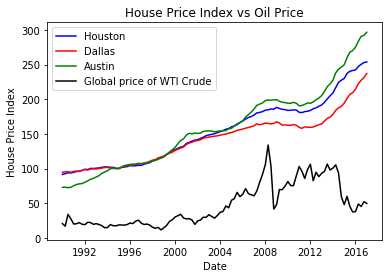

In [10]:
#from datetime import date
#today = str(date.today())

x_axis = df.index.values

#plt.plot(x_axis, y_axis)
plt.plot(x_axis, df["House Price Index for Houston"],color="blue", label="Houston" )
plt.plot(x_axis, df["House Price Index for Dallas"],color="red", label="Dallas" )
plt.plot(x_axis, df["House Price Index for Austin"],color="green", label="Austin" )
plt.plot(x_axis, df["Global price of WTI Crude"],color='black')

plt.legend(loc="best")

plt.title(f"House Price Index vs Oil Price")
plt.ylabel("House Price Index")
plt.xlabel("Date")

#plt.savefig("Latitude_v_MaxTemp.png")
plt.show()